In [96]:
%load_ext autoreload
%autoreload 2
from model import OpinionModel
from agent import OpinionAgent

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [107]:
my_model = OpinionModel(N=10,
                        mu=0.5,
                        init_u=0.5, extremist_ratio=0.1, d=0.2, extremist_u=0.05, regime="p2p")

In [108]:
my_model.schedule._agents[0].x

-0.5847746685541919

In [109]:
my_model.run_model()

In [110]:
my_model.schedule._agents[0].x

-0.5847746685541919

In [111]:
my_model.datacollector.get_agent_vars_dataframe()

Opinion  Uncertainty       Delta X  Delta U
Step AgentID                                              
0    0       -0.584775         0.05  0.000000e+00      0.0
     1       -0.338973         0.50  0.000000e+00      0.0
     2       -0.243989         0.50  0.000000e+00      0.0
     3       -0.021122         0.50  0.000000e+00      0.0
     4        0.323040         0.50  0.000000e+00      0.0
...                ...          ...           ...      ...
43   5        0.490593         0.50  2.853089e-07      0.0
     6        0.490593         0.50  1.960209e-06      0.0
     7        0.490592         0.50 -8.469057e-07      0.0
     8        0.490591         0.50  5.115969e-07      0.0
     9        0.490592         0.50 -1.113303e-06      0.0

[440 rows x 4 columns]

In [112]:
import seaborn as sns

<AxesSubplot:xlabel='Step', ylabel='Opinion'>

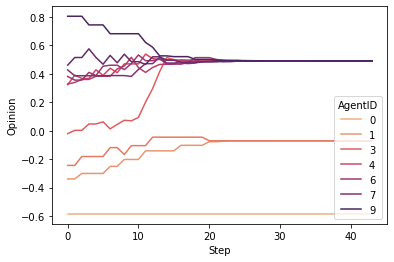

In [114]:
opinions = my_model.datacollector.get_agent_vars_dataframe().reset_index()
sns.lineplot(data=opinions, x='Step', y='Opinion', hue='AgentID', palette="flare")